<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_CONVERG_Convergence_and_machine_learning_predictions_of_Monkhorst_Pack_k_points_and_plane_wave_cut_off_in_high_throughput_DFT_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 5.5 MB/s 
     |████████████████████████████████| 325 kB 47.3 MB/s 


In [2]:
from jarvis.db.figshare import data
import pandas as pd

dft_3d=pd.DataFrame(data('dft_3d'))

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:02<00:00, 15.0MiB/s]


Loading the zipfile...
Loading completed.


In [4]:
dft_3d.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference'

<Figure size 432x288 with 0 Axes>

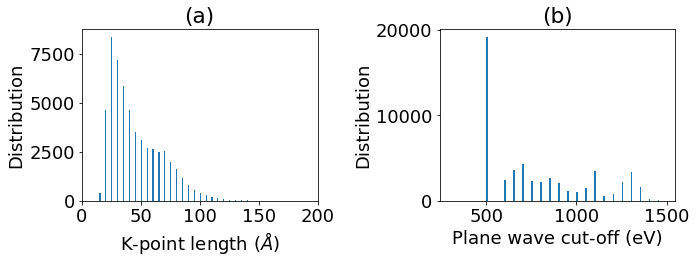

In [28]:

from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
the_grid = GridSpec(1, 2)
fig=plt.figure()
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 18})
plt.subplot(the_grid[0, 0])
val=np.array(dft_3d['kpoint_length_unit'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(1,200 , 1))
#hist, bins = np.histogram(val,bins=np.arange(1,200 , 1), density=False)
#plt.bar(bins[:-1],hist,color='b',width=1)
plt.xlabel('K-point length ($\AA$)')
plt.ylabel('Distribution')
plt.xlim([0,200])
plt.title('(a)')


plt.subplot(the_grid[0, 1])
val=np.array(dft_3d['encut'].replace('na',np.nan).dropna().values,dtype='float')
# hist, bins = np.histogram(val,bins=np.arange(300,1000 , 10), density=False)
# plt.bar(bins[:-1],hist,color='b')#,width=1)
plt.hist(val,np.arange(300,1500 , 10))
plt.xlabel('Plane wave cut-off (eV)')
plt.ylabel('Distribution')
#plt.xlim([0,200])
plt.title('(b)')
plt.tight_layout()

In [26]:
from jarvis.db.figshare import get_jid_data
from jarvis.core.kpoints import Kpoints3D
from jarvis.core.atoms import Atoms
#K-points for silicon
dat=get_jid_data(jid='JVASP-1002',dataset='dft_3d')
atoms=Atoms.from_dict(dat['atoms'])
kp = Kpoints3D().automatic_length_mesh(
    lattice_mat=atoms.lattice_mat,
    length=dat["kpoint_length_unit"],
)
kpts = kp._kpoints[0]
print ('kpts',kpts)
print ('cutoff',dat['encut'])

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
kpts [11, 11, 11]
cutoff 500
